# Potential Hazards Asteroid Detection Machine Learning

import pandas as pd
import numpy as np   
#import tensorflow as tf
#from statsmodels.tsa.seasonal import seasonal_decompose 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['axes.grid'] = True

In [13]:
asteroid_data = pd.read_csv('/home/idies/workspace/Temporary/s.hossain18/scratch/pha-ml/Dataset/train.csv',index_col=['spkid']).sort_index(axis=0)

In [14]:
asteroid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126131 entries, 2000001 to 2539759
Data columns (total 40 columns):
id                126131 non-null object
full_name         126131 non-null object
pdes              126131 non-null int64
neo               126131 non-null object
pha               126131 non-null object
H                 126131 non-null float64
diameter          126128 non-null object
albedo            126131 non-null float64
diameter_sigma    126035 non-null float64
epoch_mjd         126131 non-null int64
epoch_cal         126131 non-null float64
equinox           126131 non-null object
e                 126131 non-null float64
a                 126131 non-null float64
q                 126131 non-null float64
i                 126131 non-null float64
om                126131 non-null float64
w                 126131 non-null float64
ma                126131 non-null float64
ad                126131 non-null float64
n                 126131 non-null float64
tp        

In [18]:
asteroid_data.head(5)

,id,full_name,pdes,neo,pha,H,diameter,albedo,diameter_sigma,epoch_mjd,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
spkid,,,,,,,,,,,,,,,,,,,,,
2000001,a0000001,1 Ceres,1,N,N,3.40,939.4,0.0900,0.200,59000,...,4.613200e-09,6.176900e-08,6.618400e-08,7.355900e-09,1.115900e-11,1.201400e-12,3.686700e-08,9.439100e-09,MBA,0.40633
2000002,a0000002,2 Pallas,2,N,N,4.20,545,0.1010,18.000,59000,...,3.701900e-06,6.412400e-06,9.494400e-06,9.151500e-06,5.054200e-09,4.740800e-10,4.219400e-05,3.749600e-06,MBA,0.36151
2000003,a0000003,3 Juno,3,N,N,5.33,246.596,0.2140,10.594,59000,...,3.232100e-06,1.687400e-05,1.795300e-05,8.114300e-06,4.413000e-09,4.463100e-10,3.530500e-05,3.142200e-06,MBA,0.33306
2000004,a0000004,4 Vesta,4,N,N,3.00,525.4,0.4228,0.200,59000,...,2.207300e-07,3.940500e-07,1.817500e-07,1.335200e-06,1.681800e-09,2.664000e-10,5.480200e-06,1.301000e-06,MBA,0.39592
2000005,a0000005,5 Astraea,5,N,N,6.90,106.699,0.2740,3.140,59000,...,2.743600e-06,2.926000e-05,3.016900e-05,8.703600e-06,4.902000e-09,5.724700e-10,3.640700e-05,3.618200e-06,MBA,0.51439


In [16]:
asteroid_data.tail(5)

,id,full_name,pdes,neo,pha,H,diameter,albedo,diameter_sigma,epoch_mjd,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
spkid,,,,,,,,,,,,,,,,,,,,,
2538838,a0538838,538838 (2016 GT207),538838,N,N,16.2,3.827,0.053,0.819,59000,...,0.000008,0.000024,0.000047,0.000047,1.085500e-07,1.062300e-08,0.000242,0.000092,MBA,0.49840
2538938,a0538938,538938 (2016 JS6),538938,N,N,16.5,2.868,0.059,0.667,59000,...,0.000037,0.000046,0.000273,0.000285,1.653000e-07,1.397600e-08,0.001561,0.000149,MBA,0.55930
2539007,a0539007,539007 (2016 LL22),539007,N,N,16.1,2.63,0.070,0.621,59000,...,0.000034,0.000064,0.000131,0.000104,4.026900e-07,3.001200e-08,0.000597,0.000355,MBA,0.61294
2539080,a0539080,539080 (2016 NW12),539080,N,N,17.0,2.788,0.027,0.456,59000,...,0.000008,0.000074,0.000092,0.000066,7.375600e-08,9.029800e-09,0.000296,0.000058,MBA,0.50012
2539759,a0539759,539759 (2016 UO107),539759,N,N,16.0,3.064,0.143,0.552,59000,...,0.000011,0.000146,0.000154,0.000042,3.002800e-07,1.170500e-08,0.000331,0.000271,OMB,0.60971


In [19]:
asteroid_data.shape

(126131, 40)

In [30]:
dataframe=asteroid_data.drop(columns=['id','full_name','pdes','diameter_sigma','epoch_mjd','epoch_cal','equinox','neo','sigma_e','sigma_a','sigma_q','sigma_i','sigma_om','sigma_om','sigma_w','sigma_ma','sigma_ad','sigma_n','sigma_tp','sigma_per','class','rms'])

In [35]:
dataframe.head(5)

,pha,H,diameter,albedo,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld
spkid,,,,,,,,,,,,,,,,,,,
2000001,N,3.40,939.4,0.0900,0.077557,2.767657,2.553006,10.588621,80.286986,73.731671,162.686252,2.982308,0.214060,2.458240e+06,2.018050e+07,1681.770740,4.604437,1.58865,618.254921
2000002,N,4.20,545,0.1010,0.229972,2.773841,2.135935,34.832934,173.024740,310.202392,144.975676,3.411748,0.213345,2.458321e+06,2.018072e+07,1687.410991,4.619880,1.23429,480.348639
2000003,N,5.33,246.596,0.2140,0.256936,2.668285,1.982706,12.991044,169.851482,248.066192,125.435354,3.353865,0.226129,2.458446e+06,2.018112e+07,1592.013770,4.358696,1.03429,402.514639
2000004,N,3.00,525.4,0.4228,0.088516,2.362014,2.152938,7.141893,103.809046,150.874956,204.327629,2.571090,0.271507,2.459574e+06,2.021123e+07,1325.934723,3.630211,1.14080,443.965136
2000005,N,6.90,106.699,0.2740,0.190913,2.574037,2.082619,5.367427,141.571024,358.648423,17.846337,3.065455,0.238661,2.458926e+06,2.020032e+07,1508.414423,4.129814,1.09575,426.433028


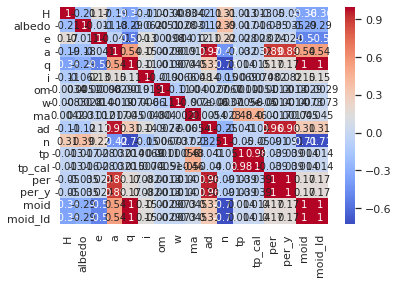

In [32]:
sns.heatmap(dataframe.corr(),cmap='coolwarm',annot=True)

In [36]:
dataframe.corr()

,H,albedo,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld
H,1.000000,-0.208907,0.165524,-0.190742,-0.355427,-0.110079,-0.003431,-0.008326,0.004210,-0.109647,0.306981,-0.013186,-0.012723,-0.050443,-0.050443,-0.355064,-0.355064
albedo,-0.208907,1.000000,-0.011441,-0.180549,-0.288644,-0.062048,0.005074,-0.002761,0.003073,-0.117952,0.392650,-0.016613,-0.016398,-0.035212,-0.035212,-0.291775,-0.291775
e,0.165524,-0.011441,1.000000,-0.041110,-0.523409,0.134909,-0.000980,0.013888,-0.012500,0.108800,0.216065,-0.028132,-0.028126,0.024395,0.024395,-0.502319,-0.502319
a,-0.190742,-0.180549,-0.041110,1.000000,0.536270,0.153608,-0.002898,-0.001944,0.016710,0.968201,-0.416690,-0.032241,-0.031997,0.894848,0.894848,0.539305,0.539305
q,-0.355427,-0.288644,-0.523409,0.536270,1.000000,0.112252,-0.001900,-0.007426,0.045346,0.308058,-0.726151,0.014345,0.014532,0.166488,0.166488,0.997285,0.997285
i,-0.110079,-0.062048,0.134909,0.153608,0.112252,1.000000,-0.018537,-0.006583,-0.004796,0.139868,-0.147910,0.006852,0.007371,0.081798,0.081798,0.149816,0.149816
om,-0.003431,0.005074,-0.000980,-0.002898,-0.001900,-0.018537,1.000000,-0.108118,0.003951,-0.002703,0.006747,0.001107,0.000508,-0.001347,-0.001347,-0.002865,-0.002865
w,-0.008326,-0.002761,0.013888,-0.001944,-0.007426,-0.006583,-0.108118,1.000000,-0.001964,0.000010,0.003660,-0.000560,-0.000019,-0.001351,-0.001351,-0.007350,-0.007350
ma,0.004210,0.003073,-0.012500,0.016710,0.045346,-0.004796,0.003951,-0.001964,1.000000,0.005394,-0.023382,0.484937,0.456491,-0.001734,-0.001734,0.045169,0.045169
ad,-0.109647,-0.117952,0.108800,0.968201,0.308058,0.139868,-0.002703,0.000010,0.005394,1.000000,-0.254442,-0.040592,-0.040372,0.959281,0.959281,0.312284,0.312284
